In [1]:
# 필요한 패키지를 설치합니다
%%capture
!pip install pororo -q
!pip install imapclient -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/news_feeder')

In [4]:
import time
import random

In [7]:
""" 주식종목 뉴스(네이버 파이넌스) Crawling 하기 """  
  
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
 
 
# os.chdir('자신의 디렉토리 주소')
os.chdir('/content/drive/MyDrive/Colab Notebooks/news_feeder')
 
 
def crawler(company_code, num_article):
    
    done_page_num=0

    # page = 1
    num_per_page=20
    num_page,remainder=divmod(num_article,20)
    num_page+=1

    article_result=[]

    # while page <= int(maxpage): 
    
    # 원하는 개수만큼만 가져오게끔 설계 필요
    # 페이지를 지정해 주어야하는 필요성
    # 페이지는 보이지 않게 내부 로직으로 처리하고, 사용자는 필요한 아티클의 수만 설정해서 가져오게끔 
    
    for page in range(done_page_num+1, done_page_num+num_page+1):
        try:
            url = 'https://finance.naver.com/item/news_news.nhn?code=' + str(company_code) + '&page=' + str(page) 
            source_code = requests.get(url).text
            html = BeautifulSoup(source_code, "lxml")
    
            
            # 뉴스 링크
            links = html.select('.title') 

            link_result =[]
            if page == num_page:
                links=links[:remainder]

            for link in links: 
                add = 'https://finance.naver.com' + link.find('a')['href']
            
                link_result.append(add)
        except Exception:
            pass 
        # print(len(link_result))

        
        # 뉴스 날짜 
        # dates = html.select('.date') 
        # date_result = [date.get_text() for date in dates] 
        
        cnt=0
        for article_url in link_result: 
            try:
                cnt+=1
                if cnt%100==0:
                    print(f"{cnt}번째 기사 처리중")
            #    article_url = link_result[0] 
                article_source_code = requests.get(article_url).text
                article_html = BeautifulSoup(article_source_code, "lxml")
                article_time = article_html.select('.tah')[0].get_text()

                # 뉴스 내용
                article_contents = article_html.select('.scr01')
                article_contents=article_contents[0].get_text()
                article_contents = re.sub('\n','',article_contents)
                article_result.append((article_contents,article_time))
                time.sleep(random.uniform(0.1,0.7))
            except Exception:
                pass

        # print("다운 받고 있습니다------")

    return article_result

In [8]:
# 종목 리스트 파일 열기  
# 회사명을 종목코드로 변환 
        
def convert_to_code(company, max_num):
    
    data = pd.read_csv('company_list.txt', dtype=str, sep='\t')   # 종목코드 추출 
    company_name = data['회사명']
    keys = [i for i in company_name]    #데이터프레임에서 리스트로 바꾸기 
 
    company_code = data['종목코드']
    values = [j for j in company_code]
 
    dict_result = dict(zip(keys, values))  # 딕셔너리 형태로 회사이름과 종목코드 묶기 
    
    pattern = '[a-zA-Z가-힣]+' 
    
    if bool(re.match(pattern, company)) == True:         # Input에 이름으로 넣었을 때  
        company_code = dict_result.get(str(company))
        return crawler(company_code, max_num)

    else:                                                # Input에 종목코드로 넣었을 때       
        company_code = str(company)      
        return crawler(company_code, max_num)
        

In [13]:
crawl_result=convert_to_code("삼성전자",10000)

In [14]:
import pandas as pd
pd.DataFrame(crawl_result).to_csv("samsung_crawl_3.csv")

In [ ]:
pd.read_csv("samsung_crawl_1.csv")

,Unnamed: 0,0,1
0,0,차와 사물 연결 통신기술 개발기업 사바리 인수[이데일리 신민준 기자] 삼성전자(00...,2021.03.01 21:21
1,1,/삼성전자 홈페이지 캡처[서울경제] 삼성전자의 전장 사업 자회사 하만이 차량과 사물...,2021.03.01 21:18
2,2,\t\t\t [머니투데이 심재현 기자] /사바리 홈페이지 캡쳐.삼성전자가 미국의 미...,2021.03.01 18:55
3,3,하만 통해 '사바리' 품어자율주행 경쟁력 강화 포석전장기업 M&A 본격화 전망사진=...,2021.03.01 17:27
4,4,2019년엔 환차익 3조164억원1년새 손실 변동폭 8조에 달해현대차 등 다른 기업...,2021.03.01 17:53
...,...,...,...
7597,7597,\t\t\t [이데일리 양희동 기자] 신한금융투자는 30일 삼성전자(005930)가...,2020.10.30 08:02
7598,7598,갤노트20·갤Z폴드2 등 판매 호조4분기엔 아이폰12 등 경쟁 가열지난 9월 서울 ...,2020.10.30 06:50
7599,7599,이미지출처=레츠고디지털[파이낸셜뉴스] 삼성전자가 스마트폰을 두 번 접을 수있는 플렉...,2020.10.30 06:43
7600,7600,[조선비즈 창간 10주년 기획] 2020년은 21세기의 원년인 2001년에 출생한 ...,2020.10.30 06:04


In [ ]:
# 간단하고 깔끔한 요약 Pororo
from pororo import Pororo
summary = Pororo(task="summary", lang="kr")

In [ ]:
from send_email import SendEmail
emailAddr = "mattias.colab@gmail.com"   #MK: sender email address
emailPass = "gdgtowpjureldhcc"         #MK: password for sender email

In [ ]:
news_result=[]
for news in crawl_result:
    news_result.append(summary(news))

In [ ]:
result="\n".join(news_result)

In [ ]:
sendMail=SendEmail([emailAddr],emailAddr, emailPass,  "삼성전자 요약본 뉴스 알고싶나?",result)

Success: Email is sent


In [ ]:
! pip install xmltodict

In [ ]:
# https://infinite-learning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EB%84%A4%EC%9D%B4%EB%B2%84-%EA%B8%88%EC%9C%B5-%EC%BD%94%EC%8A%A4%ED%94%BC-10%EB%85%84%EC%B9%98-%EC%A2%85%EA%B0%80-%EC%A0%95%EB%B3%B4-%EC%88%98%EC%A7%91%EC%9D%BC%EB%B4%89

import requests
import pandas as pd
import xmltodict
import json

stock_code='005930'
count='2500'
url=f'https://fchart.stock.naver.com/sise.nhn?symbol={stock_code}&timeframe=day&count={count}&requestType=0'

rs = requests.get(url)
dt =xmltodict.parse(rs.text)
js = json.dumps(dt, indent=4)
js = json.loads(js)

data = pd.json_normalize(js['protocol']['chartdata']['item'])

df = data['@data'].str.split('|', expand=True)

df.columns = ["date","open","high","low","close","Volume"]

In [ ]:
df.date=df.date.apply(pd.to_datetime)

,date,open,high,low,close,Volume
0,20101230,18840,19040,18840,18980,183831
1,20110103,19100,19320,19000,19160,265562
2,20110104,19120,19219,18980,19160,274488
3,20110105,19100,19100,18840,18840,336224
4,20110106,18840,18980,18460,18600,387488
...,...,...,...,...,...,...
2495,20210218,83200,83600,82100,82100,21327683
2496,20210219,82300,82800,81000,82600,25880879
2497,20210222,83800,84200,82200,82200,25419886
2498,20210223,81200,82900,81100,82000,20587314


In [ ]:
news_df=pd.DataFrame(crawl_result)

In [ ]:
news_df.columns=["news","time"]

In [ ]:
news_df.time=news_df.time.apply(pd.to_datetime)

In [ ]:
df_to_use=df[["date","close"]]

In [ ]:
df_to_use.columns=["stock_date","stock_close"]

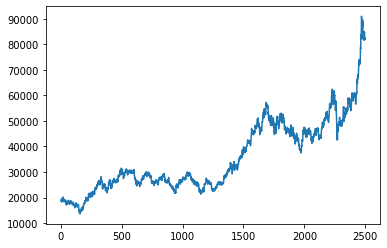

In [ ]:
df_to_use.stock_close.astype(int).plot()

In [ ]:
news_df["date"]=news_df["time"].str.split(" ").str[1]
news_df["hour_minute"]=news_df["time"].str.split(" ").str[2]

In [ ]:
news_df=news_df.drop("time",axis=1)

In [ ]:
news_df["date","hour_minute"]=news_df["time"].apply(lambda x: x[1:].split(" "))

In [ ]:
news_df

,news,date,hour_minute
0,"삼성전자, 2020 3Q 점유율 40% 돌파고성능·고효율 초격차 전략 먹혔다[헤럴드...",2021.02.24,14:16
1,코스닥 전체 시장 382조원의 절반 육박 [파이낸셜뉴스] 국내 벤처기업의 ...,2021.02.24,12:01
2,"삼성전자, 31.9%로 역대 최대 점유율 달성""QLED·초대형 TV 집중 전략 주효...",2021.02.24,11:50
3,[파이낸셜뉴스] 삼성전자가 15년 연속 글로벌 TV 시장 1위를 달성했다. L...,2021.02.24,10:55
4,6세대 V낸드로 업계 최초 OCP 규격 SSD 선봬데이터센터 업계 요구 성능·전력효...,2021.02.24,11:47
5,6세대 V낸드로는 업계 최초로 OCP 규격 충족업계 최고 전력효율 특성으로 비용 절...,2021.02.24,11:00
6,\t\t\t [머니투데이 심재현 기자] 삼성전자가 양산한 데이터센터 전용 고성능 S...,2021.02.24,11:00
7,삼성전자 OCP SSD PM9A3 [파이낸셜뉴스] 삼성전자가 오픈컴퓨트프로젝트(OC...,2021.02.24,11:00
8,"韓삼성·네덜란드NXP, ""근로자 안전에 역점""공정 내 방대한 화학물·가스 최적세팅 ...",2021.02.24,11:23
9,업계 최초로 6세대 V낸드 기반전력 효율 상승·탄소저감 효과데이터센터 전용 고성능 ...,2021.02.24,11:11


In [ ]:
https://finance.naver.com/item/sise_day.nhn?code=005930&page=1

In [ ]:
temp=temp.loc[temp["날짜"].isnull()==False]

In [ ]:
# 110개를 긁어 와라 -> 6번 루프를 돌고, 마지막에는 10개만 가져오기
# 5개를 긁어와라 -> 1번 루프를 돌고, 마지막에 5개만 가져오기

# 일반화: n개를 긁어와라 -> n//20+1번을 돌고, 마지막에는 n%20개를 가져와라

n=110
print((n//20)+1, n%20)

In [ ]:

#"#순이 (요약기)의 이메일. 여기서는 gmail을 사용한다. second gmail을 하나 생성하는 것이 안전하고 좋다.
import getpass
username = 'mattias.colab'
password = getpass.getpass(username + "'s password: ")


mattias.colab's password: ··········


In [ ]:

# SSL은 살살 가도록
import ssl
# context manager ensures the session is cleaned up
ssl_context = ssl.create_default_context()

# don't check if certificate hostname doesn't match target hostname
ssl_context.check_hostname = False

# don't check if the certificate is trusted by a certificate authority
ssl_context.verify_mode = ssl.CERT_NONE


# 메일 보내기 함수, gmail의 SMTP를 사용한다.
import smtplib

def sendmail(to, title, body, inreply="new"):
    sum_body =  "TL;DR: " + summary(body)
    message = "Subject: " + title + \
        "\nIn-Reply-To: " + inreply + \
        "\nFrom: Auto Summary <autosumkr@gmail.com>" + \
        "\n\n" + sum_body + \
        "\n---\n" + body

    with smtplib.SMTP_SSL("smtp.gmail.com", context=ssl_context) as server:
        server.login(username, password)
        server.sendmail(username, to, message.encode("utf8"))


In [ ]:


# IMAP로 메일을 가져와 요약한다
from imapclient import IMAPClient
import email

def check_imap():
    with IMAPClient(host="imap.gmail.com", ssl_context=ssl_context) as client:
        client.login(username, password)
        client.select_folder('INBOX')

        # search criteria are passed in a straightforward way
        # (nesting is supported)
        messages = client.search(['NOT', 'DELETED'])

        # fetch selectors are passed as a simple list of strings.
        response = client.fetch(messages, ['FLAGS', 'RFC822'])

        # `response` is keyed by message id and contains parsed,
        # converted response items.
        for message_id, data in response.items():
            
            email_message = email.message_from_bytes(data[b"RFC822"])
            
            efrom = email_message.get("From")
            eto = email_message.get("To")
            esubject = email_message.get("Subject")

            inreply = email_message.get("Message-ID")

            if eto is None or efrom is None:
              continue

            if eto == username + "@gmail.com":
                mailto = efrom
            else:
                mailto = eto
            
            ebody = ""
            for part in email_message.walk():
                if part.get_content_type() == 'text/plain':
                    charset = part.get_content_charset()
                    ebody = str(part.get_payload(decode=True), 'utf-8', 'ignore')
            
            #print("Sending", mailto, message_id, inreply, esubject)  
            try:          
              sendmail(mailto, esubject, ebody, inreply)

            except Exception as e:
              print(e)
              print("Skipping!", message_id)


            client.delete_messages(message_id)
            print("Sent!", message_id)
        client.expunge()
        client.logout()

In [ ]:
page=1
company_code="005930"

In [ ]:
url = 'https://finance.naver.com/item/news_news.nhn?code=' + str(company_code) + '&page=' + str(page) 
source_code = requests.get(url).text
html = BeautifulSoup(source_code, "lxml")

In [ ]:
# 뉴스 링크
links = html.select('.title') 

In [ ]:

link_result =[]
for link in links: 
    add = 'https://finance.naver.com' + link.find('a')['href']
    link_result.append(add)

In [ ]:
links

[<td class="title">
 <a class="tit" href="/item/news_read.nhn?article_id=0004587963&amp;office_id=014&amp;code=005930&amp;page=1&amp;sm=" onclick="clickcr(this,'stn.ntitclust','','',event);" target="_top">삼성 미래사업 '로봇'… CEO직속 TF 꾸렸다</a>
 </td>, <td class="title">
 <a class="tit" href="/item/news_read.nhn?article_id=0003873958&amp;office_id=011&amp;code=005930&amp;page=1&amp;sm=" onclick="clickcr(this,'stn.ntitclust','','',event);" target="_top">동학개미, 작년 삼성전자 배당금 1조 챙겼다</a>
 </td>, <td class="title">
 <a class="tit" href="/item/news_read.nhn?article_id=0004502542&amp;office_id=015&amp;code=005930&amp;page=1&amp;sm=" onclick="clickcr(this,'stn.ntitclust','','',event);" target="_top">삼성디스플레이 'ESG 경영' 강화한다</a>
 </td>, <td class="title">
 <a class="tit" href="/item/news_read.nhn?article_id=0003873953&amp;office_id=011&amp;code=005930&amp;page=1&amp;sm=" onclick="clickcr(this,'stn.ntitclust','','',event);" target="_top">삼선전자에만 투자하는 펀드, 5,000억 돌파</a>
 </td>, <td class="title">
 <a class="tit" 

In [ ]:
len(links)

16

In [ ]:
# 삼성전자가 최고경영자(CEO) 직속으로
# article_html

# <div class="scr01" id="news_read">

In [ ]:

# 뉴스 링크
links = html.select('.title') 

link_result =[]
for link in links: 
    add = 'https://finance.naver.com' + link.find('a')['href']
    link_result.append(add)


article_result=[]

for article_url in link_result: 
#    article_url = link_result[0] 
    article_source_code = requests.get(article_url).text
    article_html = BeautifulSoup(article_source_code, "lxml")
    
    # 뉴스 내용
    article_contents = article_html.select('.scr01')
    article_contents=article_contents[0].get_text()
    article_contents = re.sub('\n','',article_contents)
    article_result.append(article_contents)

In [ ]:
len(article_result)

20

In [ ]:

# 뉴스 제목 
#titles = html.select('.title')
#title_result=[]
#for title in titles: 
#    title = title.get_text() 
#    title = re.sub('\n','',title)
#    title_result.append(title)



# 뉴스 날짜 
# dates = html.select('.date') 
# date_result = [date.get_text() for date in dates] 


# 뉴스 매체     
# sources = html.select('.info')
# source_result = [source.get_text() for source in sources] 


In [ ]:


# 변수들 합쳐서 해당 디렉토리에 csv파일로 저장하기 

result= {"날짜" : date_result, "언론사" : source_result, "기사제목" : title_result, "링크" : link_result} 
print(result)
df_result = pd.DataFrame(result)

In [ ]:

 
 
def main():
    info_main = input("="*50+"\n"+"실시간 뉴스기사 다운받기."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    
    company = input("종목 이름이나 코드 입력: ") 
    
    maxpage = input("최대 뉴스 페이지 수 입력: ")  
 
    convert_to_code(company, maxpage) 
 
 
 
main() 

Success: Email is sent


mattias.colab's password: ··········


In [ ]:
check_imap()

name 'summary' is not defined
Skipping! 1
Sent! 1
name 'summary' is not defined
Skipping! 2
Sent! 2
name 'summary' is not defined
Skipping! 3
Sent! 3
name 'summary' is not defined
Skipping! 4
Sent! 4
name 'summary' is not defined
Skipping! 5
Sent! 5
name 'summary' is not defined
Skipping! 6
Sent! 6
name 'summary' is not defined
Skipping! 7
Sent! 7
name 'summary' is not defined
Skipping! 8
Sent! 8
name 'summary' is not defined
Skipping! 9
Sent! 9
name 'summary' is not defined
Skipping! 10
Sent! 10
name 'summary' is not defined
Skipping! 11
Sent! 11
name 'summary' is not defined
Skipping! 13
Sent! 13
name 'summary' is not defined
Skipping! 14
Sent! 14
name 'summary' is not defined
Skipping! 15
Sent! 15
name 'summary' is not defined
Skipping! 16
Sent! 16
name 'summary' is not defined
Skipping! 17
Sent! 17
name 'summary' is not defined
Skipping! 18
Sent! 18
name 'summary' is not defined
Skipping! 19
Sent! 19
name 'summary' is not defined
Skipping! 20
Sent! 20
name 'summary' is not defined


In [ ]:
# 이제 1분단위 (60초)로 무한반복 
from time import sleep
import datetime

while(True):
  print("Checking again at", datetime.datetime.now())
  check_imap()
  sleep(60)

Checking again at 2021-02-20 11:48:52.287006


LoginError: ignored

![image](https://i.stack.imgur.com/lkvoo.jpg)

In [ ]:
# https://stackoverflow.com/questions/57113226
while True:pass